<a href="https://colab.research.google.com/github/kuwarbimal/machine-learning/blob/main/NYC_MachineLearning_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression example

In this notebook, we shall develope a linear regression model for a diabetes dataset provided by North Carolina State University (NCSU). We will feed 10 features including patient age, bmi, blood pressure, etc and model the progression of diabetes after one year.

In [ ]:
from typing import List

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
r = datasets.load_diabetes(as_frame=True)
print(r.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Just printing out our dataframe, we see 11 columns, the first 10 representing to our `X` class and the last one our regresssion variable, `y`.

In [ ]:
r["frame"]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


## Loading dataset

In [ ]:
X = r["frame"].iloc[:, :-1].to_numpy() # Load all rows and all but the last column
y = r["frame"].iloc[:, -1].to_numpy() # Load all rows and the last column

print(X.shape, y.shape)

(442, 10) (442,)


### Ensuring the data is fully normalized

The diabetes dataset has been already normalized when given to us. We verify this claim by checking that the mean of each columns is miniscule. We also check the range for each column does not exceed `[-1, +1]` for the sake of simplicity.

In [ ]:
X.mean(axis=0)

array([-3.63962254e-16,  1.30991246e-16, -8.01395149e-16,  1.28981793e-16,
       -9.04254047e-17,  1.30112110e-16, -4.56397112e-16,  3.86317424e-16,
       -3.84810333e-16, -3.39848813e-16])

In [ ]:
X.max(axis=0) - X.min(axis=0)

array([0.21795231, 0.09532176, 0.26083052, 0.24444382, 0.28069438,
       0.31440106, 0.28348611, 0.26162895, 0.25969637, 0.27337906])

## Prepending 1's to our dataset

We prepend 1's to our dataset, `X` to act as an intercept on our linear regression model. More on this later.

In [ ]:
X = np.c_[np.ones(X.shape[0]),X]

print("Size of our dataset: ", X.shape)

Size of our dataset:  (442, 11)


## Train test split
The goal of a supervised machine learning model is to predict the results for future datasets with maximum performence, as defined by the performance metric. In most cases, however, we split a big dataset into two or three parts, "training", "testing", and optionally a "validation" dataset. The training dataset is used to develop the model and learning a set of parameters by training, while the test dataset is essentially used to mock out the future results. It is used to evaluate the performance of the model. In real life, mostly when either there are several models being compared against each other, or when the performance of one model is fluctuating over several runs, the validation dataset is used to compare performance. The validation dataset is used to compte the metric which is considered the overall performance of your model.

Note that these datasets must come from the same distribution as a common assumption made during machine learning. This makes it much easier to devise a model, although it may not reflect the dynamic nature of real-life data where the test (future) dataset may differ slightly or noticably in distribution when compared with the training dataset.

In [ ]:
 # For the purpose of this notebook, we shuffle and split the X and the y into 
 # training and testing dataset with a split ratio of 3:1.

 X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
 
 print("Size of training dataset: ", X_train.shape)
 print("Size of training dataset: ", X_test.shape)

Size of training dataset:  (331, 11)
Size of training dataset:  (111, 11)


## Developing a Linear Regression model

# New Section

In [ ]:
def hypothesis(X, theta) -> float:
  """
  Run the prediction model on a dataset X based on weights, theta.

  :param X: an (m, n) shaped dataset (including intercept term)
  :param theta: an (n,) shaped vector representing the weights
  """

  return np.dot(X,theta)

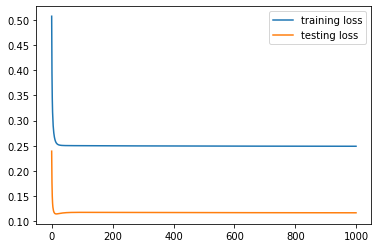

In [ ]:
def train(X_train, y_train, alpha=0.1, validation=None) -> List[float]:
  """
  Use gradient descent algorithm to optimize weights.

  :param X_train: an (m, n) shaped dataset used for training
  :param y_train: a (m,) shaped targets
  :param alpha: The learning rate

  :param validation: A validation (X_val, y_val) dataset

  The validation dataset is optional. If it is provided, we measure how the 
  loss changes over time with the validation dataset,
                    
  :param Y_test
  """
  m, n = X_train.shape

  theta = np.zeros((n))

  history = {"losses": [], "validation_losses": []}

  for i in range(1000):
    y_hat = np.matmul(X_train, theta)
    diff = y_hat-y_train


    loss = (1/(2*m)) * np.sum(diff**2)
    gradient = (1/m) * np.matmul(X_train.T, diff)

    if X_test is not None:
      test_y_hat = np.matmul(X_test, theta)
      test_diff = test_y_hat-y_test
      validation_loss = (1/(2.*m)) * np.sum(test_diff**2)
      history["validation_losses"].append(validation_loss)

    theta = theta - alpha*gradient

    history["losses"].append(loss)
  
  return theta, history

theta, history = train(X_train, y_train, alpha=0.1, X_test=X_test, y_test=y_test)

plt.plot(history["losses"], label="training loss")
plt.plot(history["validation_losses"], label="testing loss")
plt.legend()


In [ ]:
history["validation_losses"]

[7150.22972972973,
 6842.303742875399,
 6732.664545306914,
 6694.630364316878,
 6682.433537173002,
 6679.698957349775,
 6680.6078916194065,
 6683.074047474899,
 6686.306298861614,
 6689.956889651216,
 6693.833162345114,
 6697.804181908569,
 6701.771780098573,
 6705.661305181098,
 6709.417607596431,
 6713.0020764329065,
 6716.389807527481,
 6719.5668797279895,
 6722.527871223149,
 6725.2737100690565,
 6727.809890542948,
 6730.1450416659545,
 6732.289809656161,
 6734.256006547704,
 6736.055976721953,
 6737.702137267675,
 6739.2066541789245,
 6740.581222861857,
 6741.83692746408,
 6742.984158822359,
 6744.032575255466,
 6744.9910940447135,
 6745.8679043381635,
 6746.670494496038,
 6747.405688673613,
 6748.079688811293,
 6748.6981192533485,
 6749.26607201601,
 6749.788151328155,
 6750.268516518534,
 6750.710922657385,
 6751.1187586051155,
 6751.495082297782,
 6751.842653225042,
 6752.163962143774,
 6752.46125812933,
 6752.73657310419,
 6752.991744005798,
 6753.228432766387,
 6753.448144280

In [ ]:
theta

array([   6.52098904, -197.66814989,  487.54044732,  302.62559695,
        -41.70902938, -106.34914526, -207.23496508,  127.84818845,
        407.48326553,  117.1769767 ])

In [ ]:
def metric(y: List[float], y_hat: List[float]) -> float:
  return 100 * np.mean(np.abs(y - y_hat) / y)

In [ ]:
X.shape

(442, 10)

In [ ]:
import seaborn as sns

In [ ]:
list(X.columns)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
corr = X.corr();

corr.style.background_gradient(cmap='coolwarm')
# plt.matshow(X.corr())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


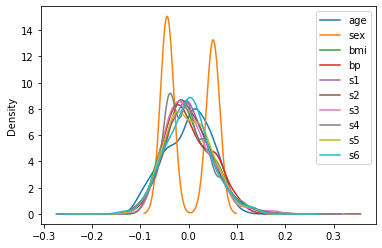

In [ ]:
X.plot.density()

In [ ]:
theta, _ = train(X_train, y_train)

y_hat = np.array([hypothesis(x, theta) for x in X_test])

metric(y_test, y_hat)

119.81049063243228

In [ ]:
y_hat

array([ 8.75308715e-01,  2.37780117e+01,  1.39482793e+00,  1.31552849e+02,
       -1.70144532e+01, -3.94883557e+01,  1.00964070e+02,  5.08492327e+01,
       -6.46985471e+01, -2.65845154e+01, -5.22324590e+01, -1.68328554e+01,
       -9.02858576e+01,  6.36728589e+01, -3.76550877e+01, -1.46329063e+01,
        7.73378812e+01,  1.01062571e+02,  3.33384226e+01,  6.67915864e+01,
        3.15585822e+01, -5.74339671e+01, -7.07601453e+01,  4.26563991e+01,
       -2.86429937e+00,  1.87276908e+01,  3.84945156e+01,  2.35067238e+01,
       -1.00057479e+02, -2.13075067e+01,  2.88296764e+01, -5.89309985e+01,
       -1.52127503e+01,  3.17678268e+01,  2.56813035e+01,  4.23128921e+01,
       -1.96395840e+01, -1.81985994e+01,  1.43631130e+01, -8.79117750e+01,
       -6.08990053e+01, -2.43023374e+01,  1.76598638e+00,  1.09044659e+01,
        1.87519327e+01, -8.04752623e+01, -7.22103817e+01, -4.55672597e+01,
       -8.94087380e+01, -9.86939853e+00, -7.30795075e+00, -9.29126746e+01,
       -2.79966682e+01, -

(array([ 4., 10., 15., 19., 27., 31., 21., 12.,  4.,  3.]),
 array([-278.44141785, -252.90772464, -227.37403144, -201.84033824,
        -176.30664504, -150.77295183, -125.23925863,  -99.70556543,
         -74.17187223,  -48.63817902,  -23.10448582]),
 <a list of 10 Patch objects>)

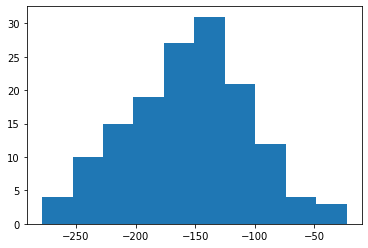

In [ ]:
plt.hist(y_hat - y_test)

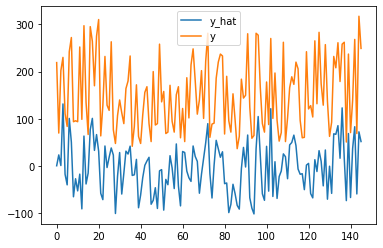

In [ ]:
plt.plot(y_hat, label="y_hat")
plt.plot(y_test, label="y")
plt.legend()